In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
x_output = np.arange(0 , 51 , 1)
x_temp = np.arange(0 , 51 , 1)
x_humidty = np.arange(0 , 101 , 1)
x_sunlight = np.arange(0 , 101 , 1)

In [3]:
temp = ctrl.Antecedent(x_temp, 'temp')
humidty = ctrl.Antecedent(x_humidty, 'hum')
sunlight = ctrl.Antecedent(x_sunlight, 'sun')
output = ctrl.Consequent(x_output, 'accepted')

C:\Users\abdalrhman\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


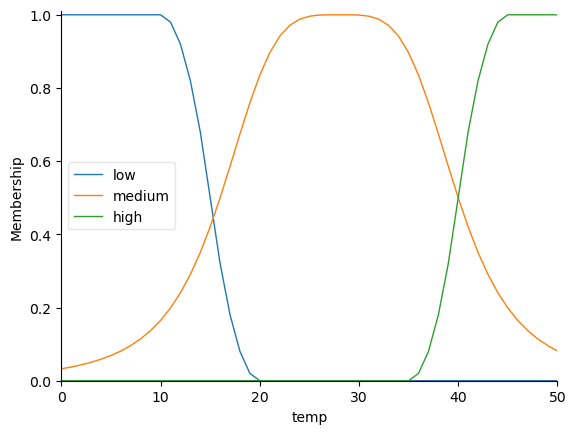

In [4]:
temp['low'] = fuzz.zmf(temp.universe, 10 , 20)
temp['medium'] = fuzz.gbellmf(temp.universe, 12 ,2 , 28)
temp['high'] = fuzz.smf(temp.universe, 35 , 45)
temp.view()

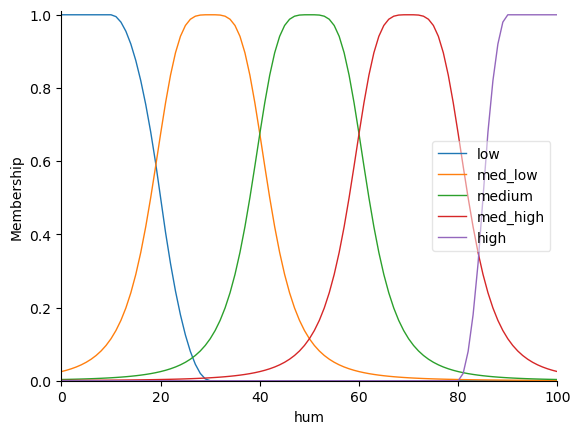

In [5]:
humidty['low'] = fuzz.zmf(humidty.universe, 10 , 30)
humidty['med_low'] = fuzz.gbellmf(humidty.universe, 12 ,2 , 30)
humidty['medium'] = fuzz.gbellmf(humidty.universe, 12 ,2 , 50)
humidty['med_high'] = fuzz.gbellmf(humidty.universe, 12 ,2 , 70)
humidty['high'] = fuzz.smf(humidty.universe, 80 , 90)
humidty.view()

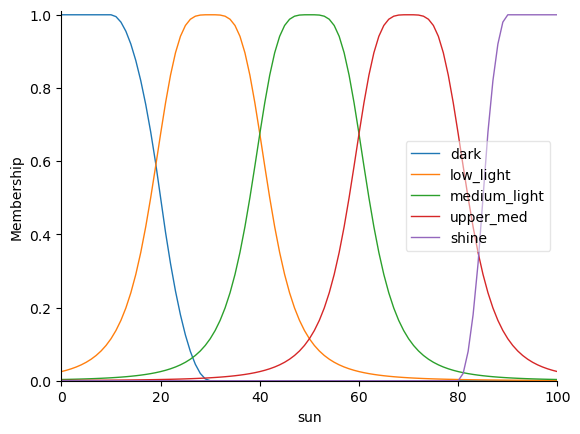

In [6]:
sunlight['dark'] = fuzz.zmf(sunlight.universe, 10 , 30)
sunlight['low_light'] = fuzz.gbellmf(sunlight.universe, 12 ,2 , 30)
sunlight['medium_light'] = fuzz.gbellmf(sunlight.universe, 12 ,2 , 50)
sunlight['upper_med'] = fuzz.gbellmf(sunlight.universe, 12 ,2 , 70)
sunlight['shine'] = fuzz.smf(sunlight.universe, 80 , 90)
sunlight.view()

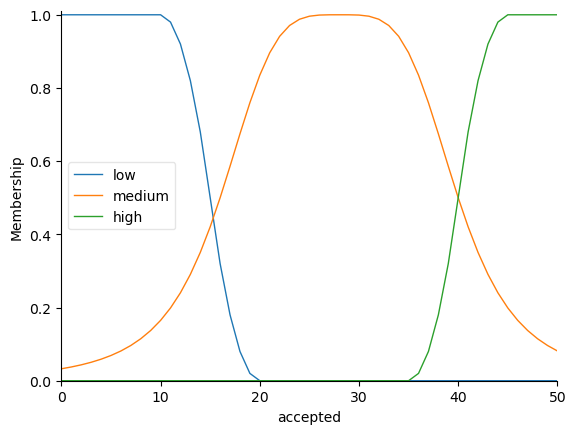

In [7]:
output['low'] = fuzz.zmf(output.universe, 10 , 20)
output['medium'] = fuzz.gbellmf(output.universe, 12 ,2 , 28)
output['high'] = fuzz.smf(output.universe, 35 , 45)
output.view()

In [8]:
rule1 = ctrl.Rule(temp['high'] , output['high'])
rule2 = ctrl.Rule(temp['medium'] &  sunlight['shine'], output['high'])
rule3 = ctrl.Rule(temp['low'] &  sunlight['shine'], output['medium'])
rule4 = ctrl.Rule(temp['low'] &  sunlight['dark'], output['low'])
rule5 = ctrl.Rule(humidty['high'] &  sunlight['dark'], output['medium'])
rule6 = ctrl.Rule(humidty['high'] &  sunlight['shine'], output['high'])
rule7 = ctrl.Rule(temp['low'] &  (humidty['low'] | humidty['med_low'] |humidty['medium']), output['low'])
rule8 = ctrl.Rule(temp['medium'] &  (humidty['low'] | humidty['med_low'] |humidty['medium']) & (sunlight['medium_light'] | sunlight['upper_med']), output['medium'])




green_house_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4 , rule5 , rule6 , rule7 , rule8])

green_house = ctrl.ControlSystemSimulation(green_house_ctrl)

the expected temp is : 27.626277890247366


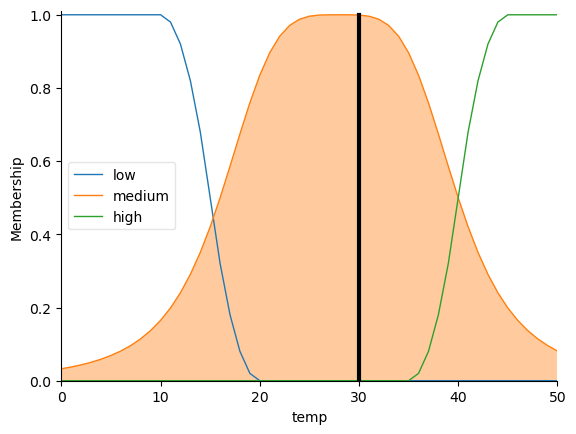

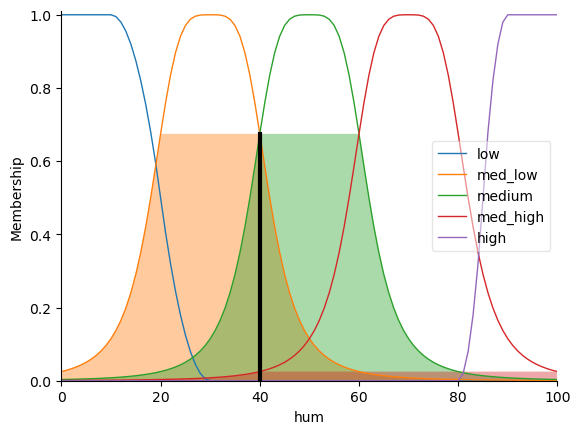

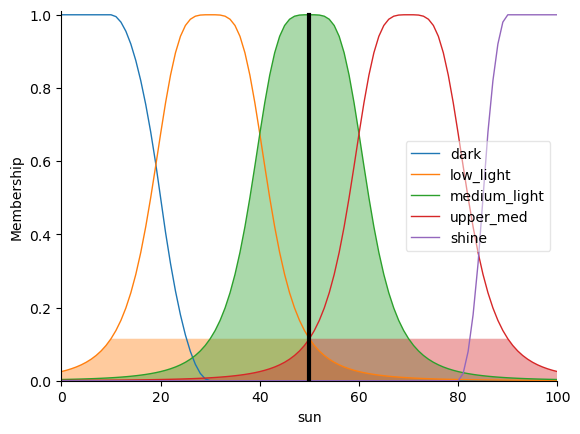

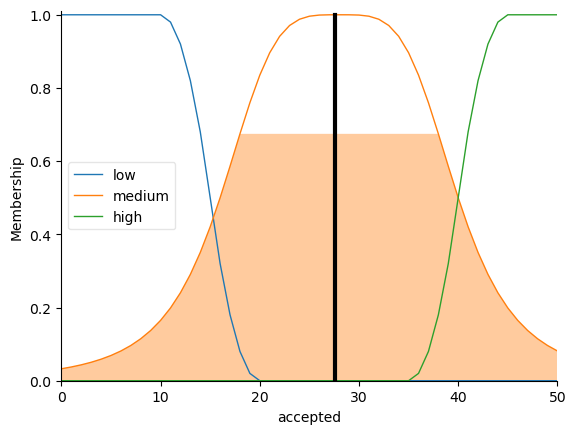

In [9]:
green_house.input['temp'] = 30
green_house.input['hum'] = 40
green_house.input['sun'] = 50

green_house.compute()

print ("the expected temp is :" ,green_house.output['accepted'])
temp.view(sim=green_house)
humidty.view(sim=green_house)
sunlight.view(sim=green_house)
output.view(sim=green_house)